# Large Paid Data


This project came from my interest in house market. I wanted to see how residential house prices evolved over the years in a particular city, sales volume and to divide by property type.

Government website offers prices payed for properties in raw format wich is great, I can work with huge real data.

https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads#september-2023-data-current-month

https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-the-ppd



1. Will start by downloading the CSV file locally from the website. At the moment the code is set not to run (commented out) as do not wish to save same file multiple times.

In [2]:


#change ... with path to file
import wget
url = 'http://prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv'
wget.download(url, '/Users/albert/Data Analytics/1. Projects & Databases/3.(pandas)Large-Price-Paid-Data/pp-complete.csv')



'/Users/albert/pp-complete.csv'

Having the data (5Gb / 28,782,629 records) is great but we need to make it human readable.

For this project will use python's pandas library and matplotlib.


2. Import python modules, load the file into a data frame and inspect the newly created table.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


#change ... with path to file
df = pd.read_csv('/Users/albert/Data Analytics/1. Projects & Databases/3.(pandas)Large-Price-Paid-Data/pp-complete.csv')
print (df.shape)
print ('==================================')
print (df.info())

(28782629, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28782629 entries, 0 to 28782628
Data columns (total 16 columns):
 #   Column                                  Dtype 
---  ------                                  ----- 
 0   {F887F88E-7D15-4415-804E-52EAC2F10958}  object
 1   70000                                   int64 
 2   1995-07-07 00:00                        object
 3   MK15 9HP                                object
 4   D                                       object
 5   N                                       object
 6   F                                       object
 7   31                                      object
 8   Unnamed: 8                              object
 9   ALDRICH DRIVE                           object
 10  WILLEN                                  object
 11  MILTON KEYNES                           object
 12  MILTON KEYNES.1                         object
 13  MILTON KEYNES.2                         object
 14  A                                

In [4]:
print (df.head(2))

   {F887F88E-7D15-4415-804E-52EAC2F10958}  70000  1995-07-07 00:00 MK15 9HP   
0  {40FD4DF2-5362-407C-92BC-566E2CCE89E9}  44500  1995-02-03 00:00  SR6 0AQ  \
1  {7A99F89E-7D81-4E45-ABD5-566E49A045EA}  56500  1995-01-13 00:00  CO6 1SQ   

   D  N  F  31 Unnamed: 8     ALDRICH DRIVE      WILLEN MILTON KEYNES   
0  T  N  F  50        NaN       HOWICK PARK  SUNDERLAND    SUNDERLAND  \
1  T  N  F  19        NaN  BRICK KILN CLOSE  COGGESHALL    COLCHESTER   

  MILTON KEYNES.1 MILTON KEYNES.2  A A.1  
0      SUNDERLAND   TYNE AND WEAR  A   A  
1       BRAINTREE           ESSEX  A   A  


3. Add column names.

In [5]:
df.columns = ['TransactionUniqueIdentifier', 'Price', 'DateOfTransfer', 'Postcode',  'PropertyType',  'Old/New', 'Duration', 'HouseNumber/Name', 'FlatNumber', 'Street', 'Locality', 'Town/City', 'District', 'County', 'PPDCategoryType', 'RecordStatus-MonthlyFileOnly' ]
print (df.columns)

Index(['TransactionUniqueIdentifier', 'Price', 'DateOfTransfer', 'Postcode',
       'PropertyType', 'Old/New', 'Duration', 'HouseNumber/Name', 'FlatNumber',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategoryType', 'RecordStatus-MonthlyFileOnly'],
      dtype='object')


4. Now I will focus on one city and keep only columns of interes. Date column will be split in Month and Year.

For this project lucky winner is Brentwood in Essex. This can be changed if later decided to focus on another city or compare two or more cityes.

In [6]:
city = 'BRENTWOOD'
county = 'ESSEX'

city_data = df[(df['Town/City']==city)&(df['County']==county)].sort_values('DateOfTransfer', ascending=True).reset_index()
city_data[['Year', 'Month', 'Time']] = city_data['DateOfTransfer'].str.split('-', expand=True)
city_data = city_data[['Year', 'Month', 'PropertyType',  'Old/New', 'Price']]
city_data.PropertyType = city_data['PropertyType'].replace({'S':'semi_detached', 'D':'detached', 'F':'flats', 'T':'terraced', 'O':'other'})
city_data.Month = city_data['Month'].replace({'01':'(1) Jan', '02':'(2) Feb', '03':'(3) Mar', '04':'(4) Apr', '05':'(5) May', '06':'(6) Jun', '07':'(7) Jul', '08':'(8) Aug', '09':'(9) Sep', '10':'(10) Oct', '11':'(11) Nov', '12':'(12) Dec'})
city_data['Old/New'] = city_data['Old/New'].replace({'N':'old', 'Y':'new'})
print (city_data)


       Year     Month   PropertyType Old/New   Price
0      1995   (1) Jan       terraced     old   59000
1      1995   (1) Jan       terraced     old   82500
2      1995   (1) Jan          flats     old   43000
3      1995   (1) Jan  semi_detached     old   95000
4      1995   (1) Jan  semi_detached     old   89000
...     ...       ...            ...     ...     ...
38852  2023  (11) Nov       terraced     old  460000
38853  2023  (11) Nov       detached     old  912500
38854  2023  (11) Nov          flats     old  315000
38855  2023  (11) Nov          flats     old  370000
38856  2023  (11) Nov          flats     old  190000

[38857 rows x 5 columns]


38,674 records/sales for Brentwood Town/City between Jan 1995 and Sep 2023

5. It might be useful a count of records based on 'property type' and 'newly build property' or 'an established residential building'

In [7]:
print ('==============================')
print (city_data.PropertyType.value_counts(dropna=False).reset_index())
print ('==============================')
print (city_data['Old/New'].value_counts(dropna=False).reset_index())
print ('==============================')
print (city_data.groupby('Old/New').PropertyType.value_counts().reset_index())
print ('==============================')




    PropertyType  count
0  semi_detached  10929
1       detached  10155
2          flats   9890
3       terraced   7377
4          other    506
  Old/New  count
0     old  36021
1     new   2836
  Old/New   PropertyType  count
0     new          flats   1969
1     new       detached    441
2     new       terraced    228
3     new  semi_detached    193
4     new          other      5
5     old  semi_detached  10736
6     old       detached   9714
7     old          flats   7921
8     old       terraced   7149
9     old          other    501


6. Same of above only for year 2023.

In [8]:
print ('==============================')
print (city_data[city_data['Year'] == '2023'].PropertyType.value_counts(dropna=False).reset_index())
print ('==============================')
print (city_data[city_data['Year'] == '2023']['Old/New'].value_counts(dropna=False).reset_index())
print ('==============================')
print (city_data[city_data['Year'] == '2023'].groupby('Old/New').PropertyType.value_counts().reset_index())
print ('==============================')



    PropertyType  count
0       detached    167
1          flats    164
2  semi_detached    164
3       terraced    104
4          other     19
  Old/New  count
0     old    605
1     new     13
  Old/New   PropertyType  count
0     new          flats     13
1     old       detached    167
2     old  semi_detached    164
3     old          flats    151
4     old       terraced    104
5     old          other     19



7. Time for a graph. Will start with a simple one to see price trend over the years.

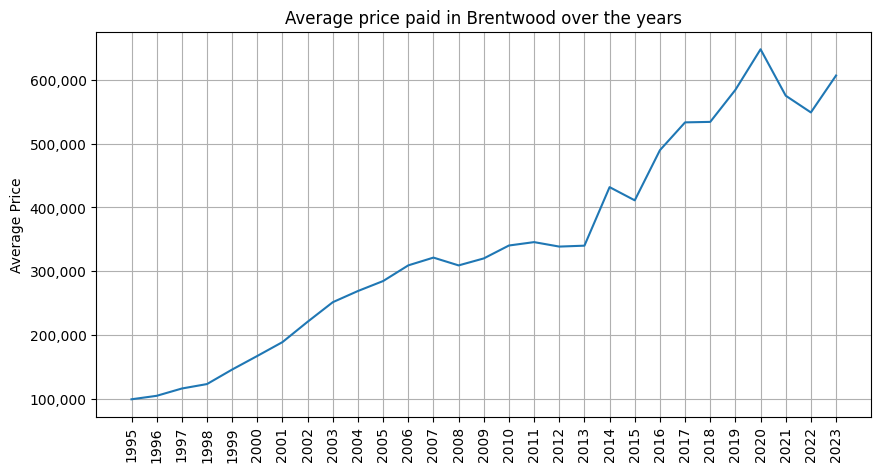

In [9]:
year_price = city_data.groupby('Year').Price.mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(year_price.Year, year_price.Price)
plt.title('Average price paid in Brentwood over the years')
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.show()


And heare is my first visualization. Looks all right but could do better. Next steps will be to remove other from property types as do not represents a residential property, chek for outliners and then split by property type. 

8. Check for the maximum price paid for a property in the selected city.

In [10]:
print (city_data.Price.max())
#print (df[df['Price'] == 77940000]


77940000


WOW. Almost £78 milion paid for a property. For sure this is not everyday house price.

Had to check :) was a sell from January 2014 for 51 WILLIAM HUNTER WAY (city centre) where now sits a Sainsbury's superstore.

9. Remove 'other'

In [11]:
city_data = city_data[city_data['PropertyType'] != 'other']

10. Boxplots! a great way to visualize distribution of prices and outliners. Will do this divided by property type and for both recorded years and 2023 alone.

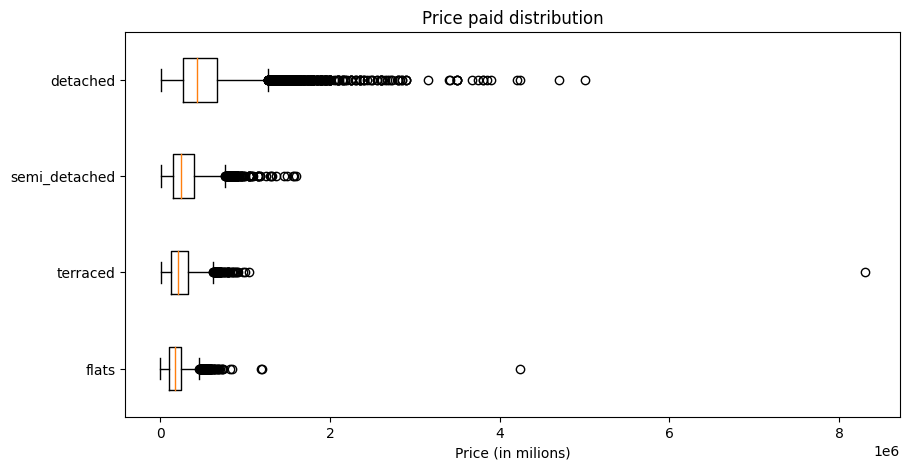

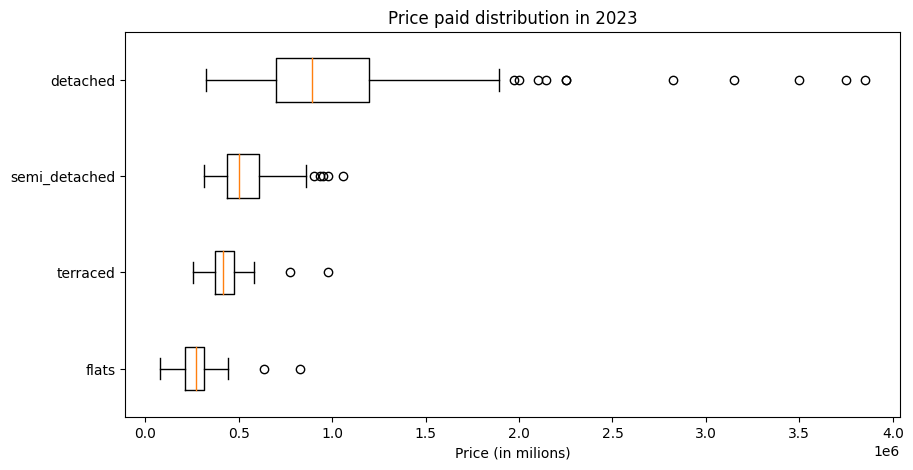

In [13]:
# new df for each PropertyType
flats_df = city_data[city_data['PropertyType'] == 'flats']
terraced_df = city_data[city_data['PropertyType'] == 'terraced']
semi_detached_df = city_data[city_data['PropertyType'] == 'semi_detached']
detached_df = city_data[city_data['PropertyType'] == 'detached']

# new df for each PropertyType and year 2023
flats23_df = city_data[(city_data['PropertyType'] == 'flats')&(city_data['Year'] == '2023')]
terraced23_df = city_data[(city_data['PropertyType'] == 'terraced')&(city_data['Year'] == '2023')]
semi_detached23_df = city_data[(city_data['PropertyType'] == 'semi_detached')&(city_data['Year'] == '2023')]
detached23_df = city_data[(city_data['PropertyType'] == 'detached')&(city_data['Year'] == '2023')]


# price paid distribution
plt.figure(figsize=(10,5))
plt.boxplot([flats_df.Price, terraced_df.Price, semi_detached_df.Price, detached_df.Price], vert=False)
plt.xlabel('Price (in milions)')
plt.yticks([1,2,3,4],['flats', 'terraced', 'semi_detached', 'detached'])
plt.title('Price paid distribution')

# price paid distribution in 2023
plt.figure(figsize=(10,5))
plt.boxplot([flats23_df.Price, terraced23_df.Price, semi_detached23_df.Price, detached23_df.Price], vert=False)
plt.xlabel('Price (in milions)')
plt.yticks([1,2,3,4],['flats', 'terraced', 'semi_detached', 'detached'])
plt.title('Price paid distribution in 2023')

plt.show()


11. To continue cleaning the data, for a better understanding in plotting a trend, will use the mean from IQR.

In [15]:
# mean of IQR Price, gruped by year
def meanIQR(x):
    y = []
    i = []
    for year in x.Year.unique():
        IQR_year = x[x['Year'] == year]
        IQR_year = IQR_year[(IQR_year.Price >= (IQR_year.Price.quantile([0.25][0]))) & (IQR_year.Price <= (IQR_year.Price.quantile([0.75][0])))]
        IQR_year = IQR_year.Price.mean()
        y.append(year)
        i.append(IQR_year)
        df = pd.DataFrame(data = {'Year':y, 'Price':i })
    return df 
flats = meanIQR(flats_df)
terraced = meanIQR(terraced_df)
semi_detached = meanIQR(semi_detached_df)
detached = meanIQR(detached_df)



# mean of IQR Price, gruped by Month of 2023
def meanIQR23(x):
    m = []
    i = []
    for month in x.Month.unique():
        IQR_month = x[x['Month'] == month]
        IQR_month = IQR_month[(IQR_month.Price >= (IQR_month.Price.quantile([0.25][0]))) & (IQR_month.Price <= (IQR_month.Price.quantile([0.75][0])))]
        IQR_month = IQR_month.Price.mean()
        m.append(month)
        i.append(IQR_month)
        df = pd.DataFrame(data = {'Month':m, 'Price':i })
    return df 

flats23 = meanIQR23(flats23_df)
terraced23 = meanIQR23(terraced23_df)
semi_detached23 = meanIQR23(semi_detached23_df)
detached23 = meanIQR23(detached23_df)

12. Let's visualize the data just created.  Will use line plots.

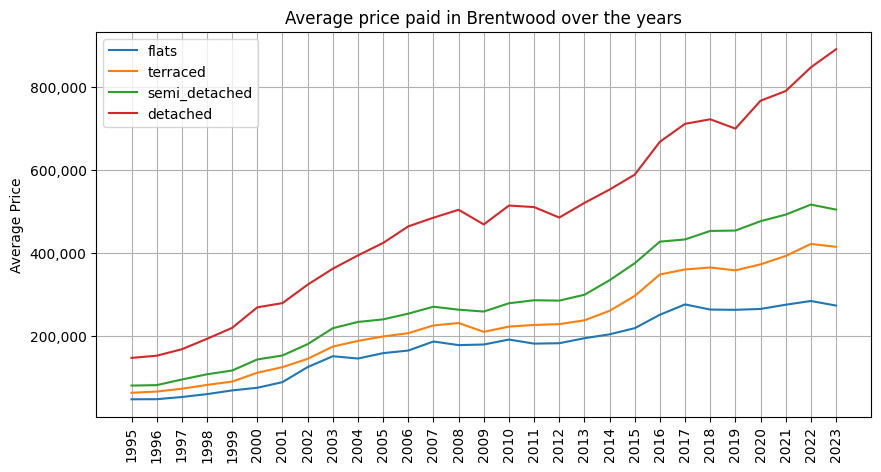

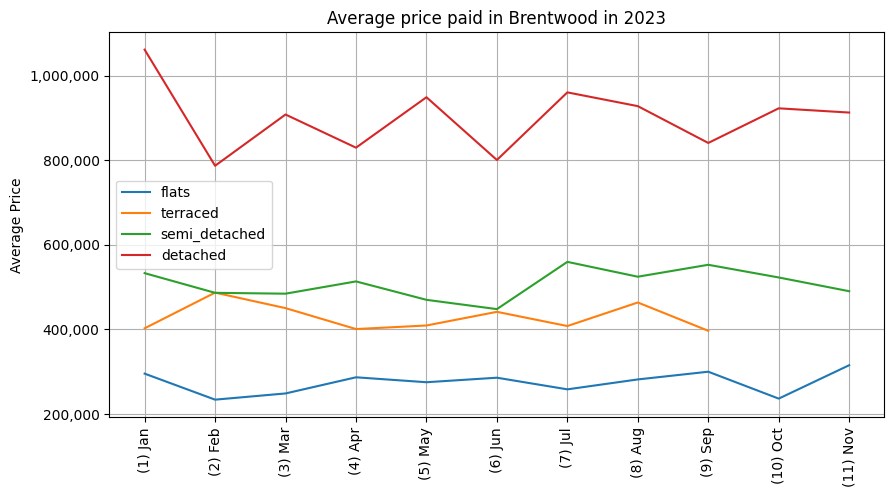

In [17]:
# average price paid in Brentwood over the years
plt.figure(figsize=(10,5))
plt.plot(flats.Year, flats.Price, label='flats')
plt.plot(terraced.Year, terraced.Price, label='terraced')
plt.plot(semi_detached.Year, semi_detached.Price, label='semi_detached')
plt.plot(detached.Year, detached.Price, label='detached')
plt.title('Average price paid in Brentwood over the years')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Average Price')
plt.legend()
plt.grid()

# average price paid in Brentwood in 2023
plt.figure(figsize=(10,5))
plt.plot(flats23.Month, flats23.Price, label='flats')
plt.plot(terraced23.Month, terraced23.Price, label='terraced')
plt.plot(semi_detached23.Month, semi_detached23.Price, label='semi_detached')
plt.plot(detached23.Month, detached23.Price, label='detached')
plt.title('Average price paid in Brentwood in 2023')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Average Price')
plt.legend()
plt.grid()

plt.show()

13. Wouldn't be nice on top of previous visualization to have a count of sales.

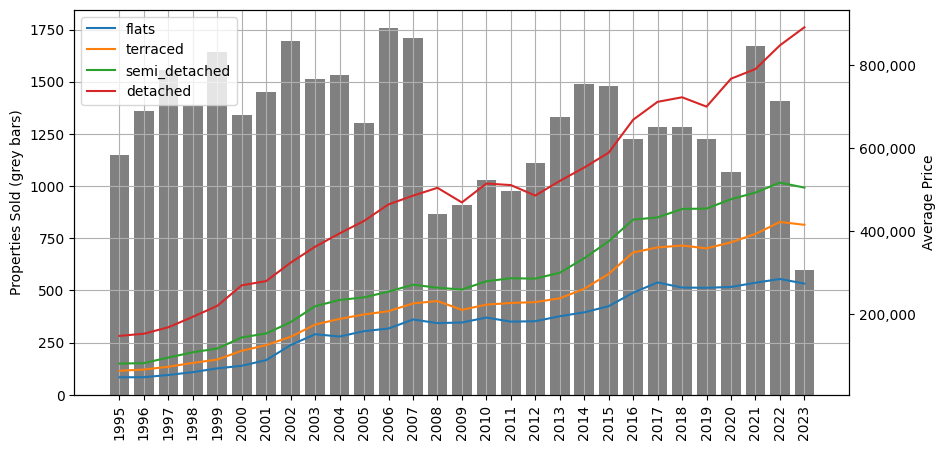

In [19]:
# count of entries for each year
year_count_df = city_data.Year.value_counts().sort_index().reset_index()

# 
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

ax.bar(year_count_df['Year'], year_count_df['count'], color='grey')
ax.grid()
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Properties Sold (grey bars)')

ax2 = ax.twinx()
ax2.plot(flats.Year, flats.Price, label='flats')
ax2.plot(terraced.Year, terraced.Price, label='terraced')
ax2.plot(semi_detached.Year, semi_detached.Price, label='semi_detached')
ax2.plot(detached.Year, detached.Price, label='detached')
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_ylabel('Average Price')
ax2.legend()

plt.show()

Consider that records for 2023 are not complete as this project was created before end of the year.